In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [ ]:
crisis_1 = pd.read_excel('../data/crisis1.xlsx', skiprows = [0,1])

In [ ]:
crisis_2 = pd.read_excel('../data/crisis2.xlsx',skiprows = [0,1])

In [ ]:
call_volume = pd.read_csv('../data/call_volume.csv')

In [ ]:
crisis_1.head()

In [ ]:
crisis_2.head()

In [ ]:
call_volume.head()

In [ ]:
crisis_1.describe()

In [ ]:
crisis_2.describe()

In [ ]:
crisis_1.info()

In [ ]:
crisis_2.info()

In [ ]:
call_volume.info()

In [ ]:
crisis_1.value_counts()

In [ ]:
crisis_1.dropna(how='all', axis=1, inplace=True)

In [ ]:
crisis_2.dropna(how='all', axis=1, inplace=True)

In [ ]:
crisis_1.isnull().sum()

In [ ]:
crisis_2.isnull().sum()

In [ ]:
#Reading in call_volume how Abi did it so we can work together on this part

# 2020 DataFrames

In [ ]:
stats_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=10, nrows=9, usecols='A:B')
stats_2020.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
#stats_2020['Total'].sub(' calls', '') this didn't work the way I wanted it to, commenting it out until I figure out how to fix it
stats_2020

In [ ]:
queue_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=23, nrows=12, usecols='A:I')
queue_dist_2020['% Answ'] = ((queue_dist_2020['% Answ']*100))
queue_dist_2020['% Unansw'] = ((queue_dist_2020['% Unansw']*100))
queue_dist_2020


In [9]:
month_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=39, nrows=12, usecols='A:K')
month_dist_2020['% Answ'] = (month_dist_2020['% Answ']*100).round(2)
month_dist_2020['% Unansw'] = (month_dist_2020['% Unansw']*100).round(2)
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,January,2880,1795,1033,52,64.13,35.87,00:08:58,00:01:15,3160,3160
1,February,2704,1698,936,70,65.38,34.62,00:10:08,00:01:03,3462,3450
2,March,4059,2537,1347,175,66.81,33.19,00:08:05,00:00:54,3223,3217
3,April,3385,2152,1147,86,66.12,33.88,00:09:23,00:01:04,2758,2750
4,May,3721,2239,1388,94,62.70,37.30,00:10:32,00:01:18,2369,2377
5,June,3693,2221,1413,59,61.74,38.26,00:10:18,00:01:10,2415,2415
6,July,3919,2543,1296,80,66.93,33.07,00:10:04,00:00:58,2678,2671
7,August,4390,2527,1803,60,58.93,41.07,00:10:15,00:01:23,2465,2479
8,September,3967,2442,1464,61,63.10,36.90,00:10:19,00:01:16,3087,3070
9,October,4143,2617,1480,46,64.28,35.72,00:09:30,00:01:19,2887,2889


In [10]:
month_2020 = month_dist_2020[['Month','% Answ']]
month_2020 = month_2020.set_index([pd.Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])])
month_2020

,Month,% Answ
Jan,January,64.13
Feb,February,65.38
Mar,March,66.81
Apr,April,66.12
May,May,62.70
June,June,61.74
July,July,66.93
Aug,August,58.93
Sep,September,63.10
Oct,October,64.28


In [8]:
day_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=55, nrows=7, usecols='A:K')
day_dist_2020['% Answ'] = (day_dist_2020['% Answ']*100).round(2)
day_dist_2020['% Unansw'] = (day_dist_2020['% Unansw']*100).round(2)
day_dist_2020

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,53.76,46.24,00:10:17,00:01:28,3641,3624
1,Monday,6811,4472,2187,152,67.89,32.11,00:08:38,00:00:59,5549,5576
2,Tuesday,6289,4138,2046,105,67.47,32.53,00:09:34,00:01:06,5544,5620
3,Wednesday,6608,4463,1981,164,70.02,29.98,00:09:13,00:00:58,5538,5696
4,Thursday,6370,4212,2003,155,68.56,31.44,00:09:34,00:00:59,4696,4779
5,Friday,6119,3939,2032,148,66.79,33.21,00:09:15,00:01:06,4646,4383
6,Saturday,6711,3683,2890,138,56.94,43.06,00:09:54,00:01:25,3718,3635


In [6]:
day_2020 = day_dist_2020[['Day', '% Answ']]
day_2020 = day_2020.set_index([pd.Index(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])])

day_2020

,Day,% Answ
Sun,Sunday,53.76
Mon,Monday,67.89
Tues,Tuesday,67.47
Wed,Wednesday,70.02
Thurs,Thursday,68.56
Fri,Friday,66.79
Sat,Saturday,56.94


In [ ]:
queue_answered_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=66, nrows=10, usecols='A:C')

queue_answered_2020

In [ ]:
service_speed_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=80, nrows=10, usecols='A:D')
service_speed_2020

In [ ]:
abandon_rate_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2020

# 2021 DataFrames

In [ ]:
stats_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=10, nrows=9, usecols='A:B')
stats_2021.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2021

In [ ]:
queue_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=23, nrows=11, usecols='A:I')

queue_dist_2021

In [11]:
month_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=38, nrows=12, usecols='A:K')
month_dist_2021['% Answ'] = (month_dist_2021['% Answ']*100).round(2)
month_dist_2021['% Unansw'] = (month_dist_2021['% Unansw']*100).round(2)
month_dist_2021

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,January,4743,3094,1556,93,67.19,32.81,00:08:25,00:01:02,2485,2469
1,February,4627,3103,1458,66,68.49,31.51,00:08:05,00:01:02,2853,2850
2,March,4700,3305,1322,73,71.87,28.13,00:08:59,00:01:08,3420,3414
3,April,4450,3175,1236,39,72.22,27.78,00:08:41,00:01:04,3103,3091
4,May,4472,2996,1390,86,68.92,31.08,00:09:17,00:01:08,2680,2680
5,June,4349,3065,1198,86,72.45,27.55,00:09:11,00:01:09,3258,3249
6,July,4591,3029,1475,87,67.87,32.13,00:09:18,00:01:15,2751,2778
7,August,4314,3028,1200,86,72.18,27.82,00:09:40,00:01:04,2939,2921
8,September,4667,3296,1304,67,72.06,27.94,00:09:05,00:01:00,3431,3439
9,October,4293,2878,1360,55,68.32,31.68,00:10:12,00:01:10,3250,3259


In [12]:
month_2021 = month_dist_2021[['Month','% Answ']]
month_2021 = month_2021.set_index([pd.Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])])

month_2021

,Month,% Answ
Jan,January,67.19
Feb,February,68.49
Mar,March,71.87
Apr,April,72.22
May,May,68.92
June,June,72.45
July,July,67.87
Aug,August,72.18
Sep,September,72.06
Oct,October,68.32


In [13]:
hour_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=54, nrows=24, usecols='A:K')
hour_dist_2021

,Hour,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,00:00 - 00:59,1709,1020,670,19,0.6080,0.3920,00:09:27,00:01:40,226,253
1,01:00 - 01:59,1409,832,570,7,0.5955,0.4045,00:09:29,00:01:40,424,471
2,02:00 - 02:59,1139,592,533,14,0.5320,0.4680,00:09:24,00:01:52,409,1574
3,03:00 - 03:59,943,544,385,14,0.5917,0.4083,00:11:00,00:01:49,125,179
4,04:00 - 04:59,853,509,334,10,0.6084,0.3916,00:09:52,00:02:02,160,179
5,05:00 - 05:59,1059,697,357,5,0.6629,0.3371,00:09:47,00:01:33,1897,283
6,06:00 - 06:59,1346,1043,288,15,0.7860,0.2140,00:08:49,00:00:45,2922,4539
7,07:00 - 07:59,1586,1156,407,23,0.7434,0.2566,00:09:21,00:00:54,1462,807
8,08:00 - 08:59,2123,1494,572,57,0.7306,0.2694,00:10:26,00:00:49,1327,1202
9,09:00 - 09:59,2136,1586,496,54,0.7678,0.2322,00:09:02,00:00:45,1567,1464


In [14]:
day_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=82, nrows=7, usecols='A:K')
day_dist_2021['% Answ'] = (day_dist_2021['% Answ']*100).round(2)
day_dist_2021['% Unansw'] = (day_dist_2021['% Unansw']*100).round(2)
day_dist_2021

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,7729,4656,3003,70,61.15,38.85,00:10:09,00:01:25,4966,4747
1,Monday,7866,5817,1919,130,75.60,24.40,00:08:49,00:00:52,5873,5913
2,Tuesday,7763,5621,2013,129,74.07,25.93,00:09:12,00:01:00,5803,5704
3,Wednesday,7576,5746,1679,151,77.84,22.16,00:08:51,00:00:52,5978,5816
4,Thursday,7599,5735,1688,176,77.79,22.21,00:08:41,00:00:51,6189,6234
5,Friday,7567,5206,2229,132,70.54,29.46,00:09:05,00:01:02,5111,5433
6,Saturday,7875,4255,3525,95,55.24,44.76,00:10:31,00:01:33,3651,3687


In [15]:
day_2021 = day_dist_2021[['Day','% Answ']]
day_2021 = day_2021.set_index([pd.Index(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])])
day_2021

,Day,% Answ
Sun,Sunday,61.15
Mon,Monday,75.60
Tues,Tuesday,74.07
Wed,Wednesday,77.84
Thurs,Thursday,77.79
Fri,Friday,70.54
Sat,Saturday,55.24


In [ ]:
service_speed_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=93, nrows=10, usecols='A:D')
service_speed_2021

In [ ]:
abandon_rate_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=107, nrows=10, usecols='A:D')
abandon_rate_2021

# 2022 DataFrames (through April)

In [ ]:
stats_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=7, nrows=9, usecols='A:B')
stats_2022.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2022

In [ ]:
queue_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=18, nrows=10, usecols='A:I')
queue_dist_2022

In [16]:
month_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=32, nrows=4, usecols='A:K')
month_dist_2022['% Answ'] = (month_dist_2022['% Answ']*100).round(2)
month_dist_2022['% Unansw'] = (month_dist_2022['% Unansw']*100).round(2)
month_dist_2022

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,January,5090,3696,1329,65,73.89,26.11,00:09:38,00:00:58,3408,3426
1,February,4127,3236,840,51,79.65,20.35,00:09:12,00:00:49,3568,3559
2,March,4034,3080,898,56,77.74,22.26,00:10:07,00:00:53,3688,3704
3,April,4014,3189,779,46,80.59,19.41,00:09:49,00:00:46,3834,3825


In [17]:
month_2022 = month_dist_2022[['Month','% Answ']]
month_2022 = month_2022.set_index([pd.Index(['Jan', 'Feb', 'Mar', 'Apr'])])
month_2022

,Month,% Answ
Jan,January,73.89
Feb,February,79.65
Mar,March,77.74
Apr,April,80.59


In [ ]:
hour_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=40, nrows=24, usecols='A:K')
hour_dist_2022

In [18]:
day_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=68, nrows=7, usecols='A:K')
day_dist_2022['% Answ'] = (day_dist_2022['% Answ']*100).round(2)
day_dist_2022['% Unansw'] = (day_dist_2022['% Unansw']*100).round(2)
day_dist_2022

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,2680,1780,884,16,67.01,32.99,00:10:16,00:01:09,1615,1490
1,Monday,2766,2131,587,48,78.78,21.22,00:09:03,00:00:45,2290,2215
2,Tuesday,2515,2043,444,28,82.35,17.65,00:08:55,00:00:42,2054,2016
3,Wednesday,2334,1894,406,34,82.60,17.40,00:09:59,00:00:44,2501,2470
4,Thursday,2179,1823,317,39,85.45,14.55,00:09:25,00:00:40,2368,2378
5,Friday,2371,1884,451,36,80.98,19.02,00:09:15,00:00:45,2026,2151
6,Saturday,2420,1646,757,17,68.72,31.28,00:11:18,00:01:15,1644,1794


In [19]:
day_2022 = day_dist_2022[['Day','% Answ']]
day_2022 = day_2022.set_index([pd.Index(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])])
day_2022

,Day,% Answ
Sun,Sunday,67.01
Mon,Monday,78.78
Tues,Tuesday,82.35
Wed,Wednesday,82.60
Thurs,Thursday,85.45
Fri,Friday,80.98
Sat,Saturday,68.72


In [ ]:
service_speed_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=80, nrows=10, usecols='A:D')
service_speed_2022

In [ ]:
abandon_rate_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2022

In [ ]:
#day_dist_2020.hist(column='Received', by='Day') -- wanted a histogram but I think I need to just do a bar plot
plt.figure(figsize=(15,10))
plt.bar(day_dist_2020['Day'], day_dist_2020['Received'])
plt.title('Received Calls by Day of Week - 2020')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

In [ ]:
month_dist_2020[['Answered','Unanswered']].plot(kind='bar', stacked=True, cmap="viridis")
plt.title("Calls by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls");

In [ ]:
w = 0.9

month_dist_2020[['% Answ','% Unansw']].plot(kind='bar', cmap = 'viridis',stacked=True)
#plt.bar(month_dist_2020['Month'], month_dist_2020['% Answ'], w)
#plt.bar(month_dist_2020['Month'], month_dist_2020['% Unansw'], w, bottom= month_dist_2020['% Unansw'])
plt.title("Percent Calls Answered by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.show()

In [ ]:
#used percentages to help normalize the data

w = 0.9

month_dist_2020.plot(x='Month', y=['% Answ','% Unansw'], color=['#3B528B', '#21918C'], kind = 'bar', stacked = True)

#plt.bar(month_dist_2020['Month'], month_dist_2020['% Answ'], w, label = '% Answered')
#plt.bar(month_dist_2020['Month'], month_dist_2020['% Unansw'], w, label = '% Unanswered', bottom= month_dist_2020['% Answ'])
plt.title("Percent Calls Answered by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
#plt.legend()
plt.show()

In [ ]:
w = 0.9


        
month_dist_2021.plot(x='Month', y=['% Answ','% Unansw'], color=['#3B528B', '#21918C'], kind = 'bar', stacked = True)
#plt.bar(month_dist_2021['Month'], month_dist_2021['% Answ'], w, color = 'c', label = '% Answered')
#plt.bar(month_dist_2021['Month'], month_dist_2021['% Unansw'], w, label = '% Unanswered', bottom= month_dist_2021['% Answ'])

plt.title("Percent Calls Answered by Month - 2021")
plt.xlabel("Month")
plt.ylabel("Calls")

plt.xticks(rotation=50)
#plt.legend()
plt.show()

In [ ]:
w = 0.9
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1.1,y_list[i-1],y_list[i-1])

month_dist_2022.plot(x='Month', y=['% Answ','% Unansw'], color=['#3B528B', '#21918C'], kind = 'bar', stacked = True)        
#plt.bar(month_dist_2022['Month'], month_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
#plt.bar(month_dist_2022['Month'], month_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= month_dist_2022['% Answ'])
add_value_label(month_dist_2022['% Answ'],month_dist_2022['% Answ'])
plt.title("Percent Calls Answered by Month - 2022")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
#plt.legend()
plt.show()

In [ ]:
#used percentages to help normalize the data

w = 0.9
def add_value_label_1(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1.3,y_list[i-1],y_list[i-1])

day_dist_2020.plot(x='Day', y=['% Answ','% Unansw'], color=['#3B528B', '#21918C'], kind = 'bar', stacked = True, legend=False)
#plt.bar(day_dist_2020['Day'], day_dist_2020['% Answ'], w, color = 'c', label = '% Answered')
#plt.bar(day_dist_2020['Day'], day_dist_2020['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2020['% Answ'])
add_value_label_1(day_dist_2020['% Answ'],day_dist_2020['% Answ'])
plt.title("Percent Calls Answered by Day - 2020")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
#plt.legend()
plt.show()

In [ ]:
#used percentages to help normalize the data

w = 0.9
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
       plt.text(i-1.3,y_list[i-1],y_list[i-1])

day_dist_2021.plot(x='Day', y=['% Answ','% Unansw'], color=['#3B528B', '#21918C'], kind = 'bar', stacked = True, legend = False)
        
#plt.bar(day_dist_2021['Day'], day_dist_2021['% Answ'], w, color = 'c', label = '% Answered')
#plt.bar(day_dist_2021['Day'], day_dist_2021['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2021['% Answ'])
add_value_label(day_dist_2021['% Answ'],day_dist_2021['% Answ'])
plt.title("Percent Calls Answered by Day - 2021")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
#plt.legend()
plt.show()

Goal: Try to add data labels for perecentages -- exploring plt.text() options

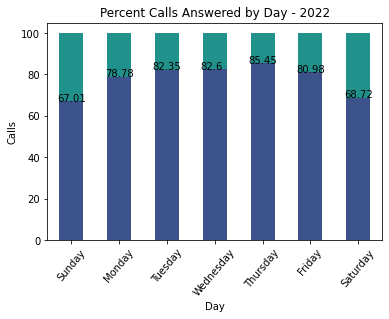

In [22]:
w = 0.9


def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
       plt.text(i-1.3,y_list[i-1],y_list[i-1])

day_dist_2022.plot(x='Day', y=['% Answ','% Unansw'], color=['#3B528B', '#21918C'], kind = 'bar', stacked = True, legend=False)
        
#plt.bar(day_dist_2022['Day'], day_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
#plt.bar(day_dist_2022['Day'], day_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2022['% Answ'])
add_value_label(day_dist_2022['% Answ'],day_dist_2022['% Answ'])
plt.title("Percent Calls Answered by Day - 2022")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
#plt.legend()
plt.show()

#change percentages in dataframe


KeyError: 0

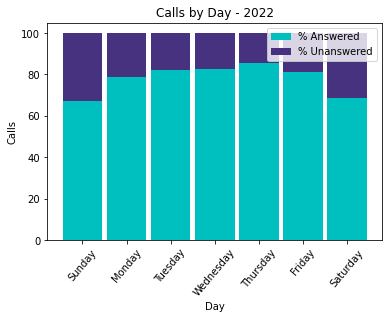

In [23]:
w = 0.9

plt.bar(day_dist_2022['Day'], day_dist_2022['% Answ'], w, color = 'c', label = '% Answered')
plt.bar(day_dist_2022['Day'], day_dist_2022['% Unansw'], w, label = '% Unanswered', bottom= day_dist_2022['% Answ'])
plt.title("Calls by Day - 2022")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend()


for x in enumerate([*day_dist_2022.index.values]):
    for (proportion) in zip(day_dist_2022.loc[x],
                                   day_dist_2022.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

https://towardsdatascience.com/how-to-make-bar-and-hbar-charts-with-labels-using-matplotlib-b701ce70ba9c

Is a line plot better?

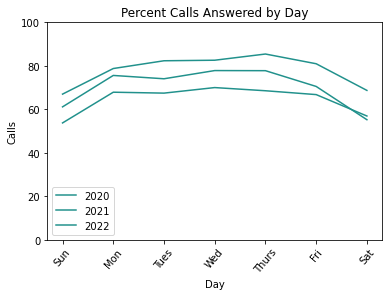

In [24]:

colors = ["#39568CFF", "#238A8DFF", "#55C667FF"]
sns.set_palette('viridis')


sns.lineplot(data= day_2020, palette='viridis')
sns.lineplot(data= day_2021, palette='viridis')
sns.lineplot(data= day_2022, palette='viridis')
plt.title("Percent Calls Answered by Day")
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.ylim(0, 100)
plt.legend(labels=['2020', '2021', '2022'])
plt.show()

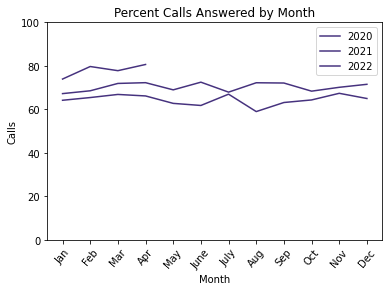

In [25]:
sns.set_palette("viridis")
sns.lineplot(data= month_2020, color =  '#39568CFF')
sns.lineplot(data= month_2021, color = '#238A8DFF')
sns.lineplot(data= month_2022, color = '#55C667FF')
plt.title("Percent Calls Answered by Month")
plt.xlabel("Month")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.ylim(0, 100)
plt.legend(labels=['2020', '2021', '2022'])
plt.show()

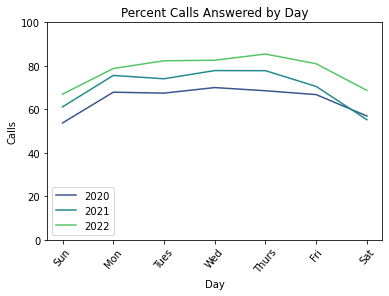

In [90]:
fig = plt.figure()
ax = plt.subplot()
day_2020['% Answ'].plot(ax=ax, color = '#39568CFF')
day_2021['% Answ'].plot(ax=ax, color = '#238A8DFF')
day_2022['% Answ'].plot(ax=ax, color = '#55C667FF')
plt.title("Percent Calls Answered by Day")
plt.ylim(0, 100)
plt.xlabel("Day")
plt.ylabel("Calls")
plt.xticks(rotation=50)
plt.legend(labels=['2020', '2021', '2022'])
plt.show()

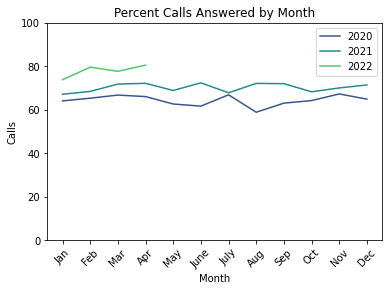

In [89]:
fig = plt.figure()
ax = plt.subplot()

month_2020['% Answ'].plot(ax=ax, color = '#39568CFF')
month_2021['% Answ'].plot(ax=ax, color = '#238A8DFF')
month_2022['% Answ'].plot(ax=ax, color = '#55C667FF')
ax.set_xticks(np.arange(len(month_2020), step=1))
plt.title("Percent Calls Answered by Month")
plt.xlabel('Month')
plt.ylabel("Calls")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(labels=['2020', '2021', '2022'])
plt.show()